In [1]:
from sys import path as syspath
from os import path as ospath
from astropy import units as u

syspath.append('../')
syspath.append('../_mining')


In [2]:
from discminer.mining_utils import get_noise_mask, init_data_and_model
datacube, model = init_data_and_model(Rmin=0, Rmax=1.2)

/home/aleruzza/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


I am using the new interpolation strategy
     _  _                        _                    
  __| |(_) ___   ___  _ __ ___  (_) _ __    ___  _ __ 
 / _` || |/ __| / __|| '_ ` _ \ | || '_ \  / _ \| '__|
| (_| || |\__ \| (__ | | | | | || || | | ||  __/| |   
 \__,_||_||___/ \___||_| |_| |_||_||_| |_| \___||_|   
                                                      

*====================================================================================================*
Computing grid...
Grid maximum extent: 120689578165943.16
Grid step (cell size): 969394202136.0896
*====================================================================================================*
*====================================================================================================*
Computing grid...
Grid maximum extent: 128444731783031.88
Grid step (cell size): 969394202136.0896
*====================================================================================================*
Setting beam_info

# Modified version

In [3]:
%%timeit
modelcube = model.make_model(make_convolve=True)


*====================================================================================================*
Running prototype model with the following parameters:

{'height_lower': {'Rb': 803.90594,
                  'p': 1.107099,
                  'q': 2.859784,
                  'z0': 14.227028},
 'height_upper': {'Rb': 108.607483,
                  'p': 1.65208,
                  'q': 0.550336,
                  'z0': 52.680114},
 'intensity': {'I0': 0.10439999999999999,
               'Rout': 717.971915,
               'p': -2.659016,
               'q': 2.156254},
 'lineslope': {'Ls': 1.676401, 'p': 0.314061},
 'linewidth': {'L0': 0.316459, 'p': -0.288951, 'q': -0.355926},
 'orientation': {'PA': 1.010296,
                 'incl': -0.672928,
                 'xc': -0.91338,
                 'yc': -1.826827},
 'velocity': {'Mstar': 1.973085, 'vel_sign': -1.0, 'vsys': 5.099463}}

*====================================================================================================*
*=====

In [6]:
import numpy as np
np.save('modelcube_newinterpstrat.npy', modelcube.data)

# Original version

In [3]:
%%timeit
modelcube = model.make_model(make_convolve=True)

*====================================================================================================*
Running prototype model with the following parameters:

{'height_lower': {'Rb': 803.90594,
                  'p': 1.107099,
                  'q': 2.859784,
                  'z0': 14.227028},
 'height_upper': {'Rb': 108.607483,
                  'p': 1.65208,
                  'q': 0.550336,
                  'z0': 52.680114},
 'intensity': {'I0': 0.10439999999999999,
               'Rout': 717.971915,
               'p': -2.659016,
               'q': 2.156254},
 'lineslope': {'Ls': 1.676401, 'p': 0.314061},
 'linewidth': {'L0': 0.316459, 'p': -0.288951, 'q': -0.355926},
 'orientation': {'PA': 1.010296,
                 'incl': -0.672928,
                 'xc': -0.91338,
                 'yc': -1.826827},
 'velocity': {'Mstar': 1.973085, 'vel_sign': -1.0, 'vsys': 5.099463}}

*====================================================================================================*
*=====

In [6]:
modelcube = model.make_model(make_convolve=True)

*====================================================================================================*
Running prototype model with the following parameters:

{'height_lower': {'Rb': 803.90594,
                  'p': 1.107099,
                  'q': 2.859784,
                  'z0': 14.227028},
 'height_upper': {'Rb': 108.607483,
                  'p': 1.65208,
                  'q': 0.550336,
                  'z0': 52.680114},
 'intensity': {'I0': 0.10439999999999999,
               'Rout': 717.971915,
               'p': -2.659016,
               'q': 2.156254},
 'lineslope': {'Ls': 1.676401, 'p': 0.314061},
 'linewidth': {'L0': 0.316459, 'p': -0.288951, 'q': -0.355926},
 'orientation': {'PA': 1.010296,
                 'incl': -0.672928,
                 'xc': -0.91338,
                 'yc': -1.826827},
 'velocity': {'Mstar': 1.973085, 'vel_sign': -1.0, 'vsys': 5.099463}}

*====================================================================================================*
*=====

# Compare results

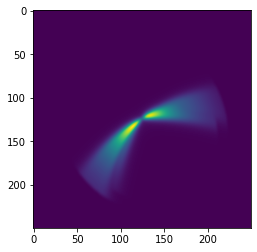

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(modelcube.data[64])

In [10]:
modelcube_nis = np.load('modelcube_newinterpstrat.npy')

In [15]:
np.max(np.abs((modelcube_nis-modelcube.data)))

3.469446951953614e-17